In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nepalihatee/val_final_processed.json
/kaggle/input/nepalihatee/train_final_processed.json
/kaggle/input/nepalihatee/test_processed.json
/kaggle/input/nepalihatee/train.json
/kaggle/input/nepalihatee/test.json
/kaggle/input/nepalihatee/val_final.json
/kaggle/input/nepalihatee/split_metadata.json
/kaggle/input/nepalihatee/train_final.json


In [2]:
# ============================================================================
# SECTION 1: INSTALLATIONS & IMPORTS
# ============================================================================

!pip install transformers datasets accelerate -q
# !pip install imbalanced-learn scikit-learn -q
!pip install indic-transliteration emoji regex -q
!pip install huggingface_hub
!pip install deep_translator

!pip install --quiet --upgrade protobuf==3.20.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.2/160.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 6.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.26.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
grain 0.2.15 requires protobuf>=5.28.3, but you have protobuf 3.20.3 which is incompatible.
onnx 1.20.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
ray 2.52.1 requires click!=8.3.*,>=7.0, but you have click 8.3.1 which is incompatible.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.
tensorflow-metadata 1.17.2 requires protobuf>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 whi

2026-02-13 12:25:49.443644: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770985549.620633      23 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770985549.670133      23 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770985550.081365      23 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770985550.081402      23 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770985550.081405      23 computation_placer.cc:177] computation placer alr

✓ All imports successful
PyTorch version: 2.8.0+cu126
CUDA available: True

 IMPROVED CONFIGURATION
Model: Rajan/NepaliBERT
Batch size: 32 (effective: 32)
Max length: 256
Learning rate: 3e-05
Epochs: 6
Warmup ratio: 0.1
Dropout: 0.3
Weight decay: 0.01
Label smoothing: 0.05
Strategy: discriminative

 LOADING DATA

✓ Data loaded:
  Train: 5577
  Validation: 620
  Test: 1450

Training distribution:
  NO: 3206 (57.49%)
  OO: 1755 (31.47%)
  OR:  375 ( 6.72%)
  OS:  241 ( 4.32%)

✓ Labels encoded: ['NO', 'OO', 'OR', 'OS']

 COMPUTING CLASS WEIGHTS

Balanced weights:
  NO: 0.435
  OO: 0.794
  OR: 3.718
  OS: 5.785

Final weights (capped 0.5-3.0):
  NO: 0.500
  OO: 0.794
  OR: 3.000
  OS: 3.000

 INITIALIZING MODEL


config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

✓ Tokenizer loaded
✓ Datasets: Train=5577, Val=620, Test=1450


pytorch_model.bin:   0%|          | 0.00/328M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Rajan/NepaliBERT and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✓ Model loaded: 81,917,188 parameters
✓ Dropout rate: 0.3

 CONFIGURING TRAINER

Training schedule:
  Samples per epoch: 5577
  Steps per epoch: 174
  Total steps: 1044
  Warmup steps: 104

✓ Discriminative optimizer:
  Embeddings:  3.00e-06
  Encoder:     3.00e-05
  Classifier:  6.00e-05


model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]


✓ Trainer configured with:
  Training strategy: STANDARD
  Early stopping patience: 3
  Evaluation every 100 steps
  Logging every 50 steps (smoothing applied to plots)

 STARTING TRAINING


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
100,1.444700,1.390304,0.579032,0.489378,0.305768,0.260750
200,1.227200,1.127673,0.527419,0.462587,0.606059,0.464292
300,1.135400,1.015267,0.603226,0.593442,0.670578,0.604623
400,1.015100,1.007608,0.670968,0.620429,0.676064,0.613320
500,0.965500,0.974872,0.604839,0.644973,0.730535,0.648179
600,0.940900,0.922993,0.701613,0.648644,0.764993,0.686796
700,0.859600,0.901616,0.748387,0.737805,0.783586,0.756613
800,0.879100,0.903445,0.720968,0.705560,0.784436,0.734610
900,0.862900,0.890690,0.733871,0.723400,0.786575,0.749242
1000,0.836300,0.902281,0.719355,0.699596,0.786633,0.729350



✅ Training completed!
⏱️  Time: 516.46s
🔥 Best model automatically loaded

✓ Model saved to: /kaggle/working/nepalibert_results/nepalibert_final

 GENERATING TRAINING VISUALIZATIONS


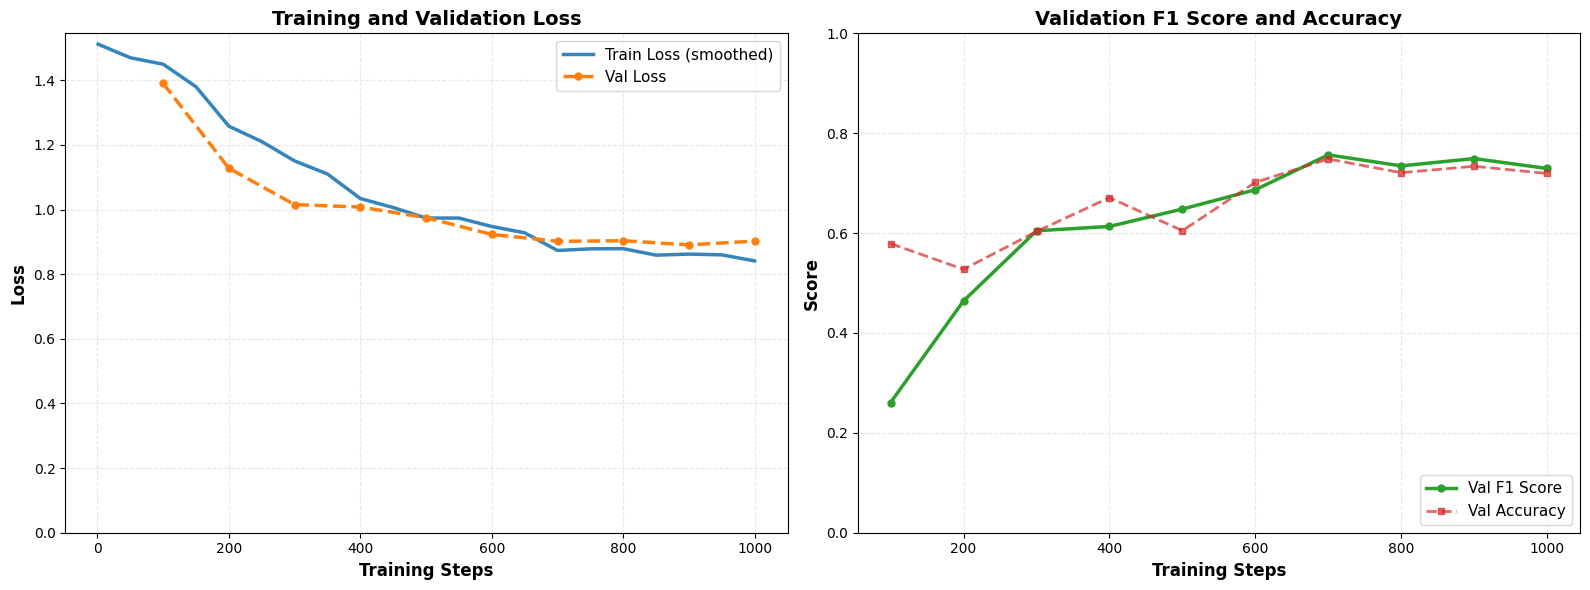

✓ Training curves saved (with smoothing applied)


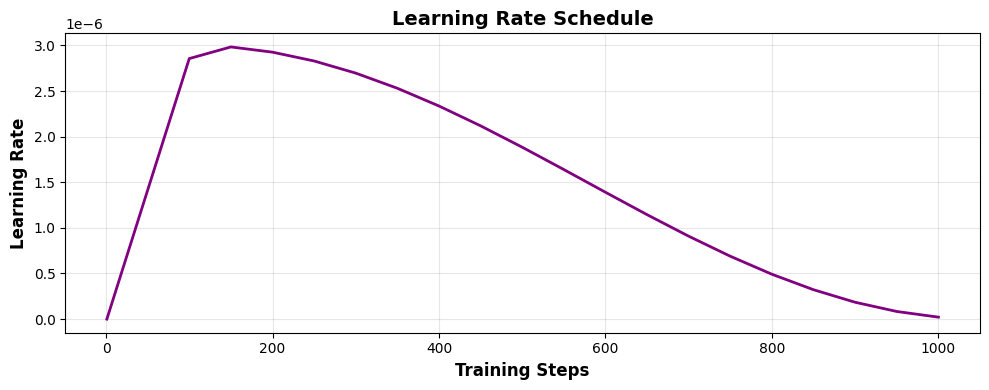

✓ Learning rate schedule saved

 VALIDATION EVALUATION



Per-Class Validation Results:
Class       Precision     Recall   F1-Score    Support
----------------------------------------------------------------------
✅ NO           0.7961     0.8118     0.8039        356
✅ OO           0.6609     0.5897     0.6233        195
✅ OR           0.6727     0.8810     0.7629         42
✅ OS           0.8214     0.8519     0.8364         27

              precision    recall  f1-score   support

          NO     0.7961    0.8118    0.8039       356
          OO     0.6609    0.5897    0.6233       195
          OR     0.6727    0.8810    0.7629        42
          OS     0.8214    0.8519    0.8364        27

    accuracy                         0.7484       620
   macro avg     0.7378    0.7836    0.7566       620
weighted avg     0.7464    0.7484    0.7457       620



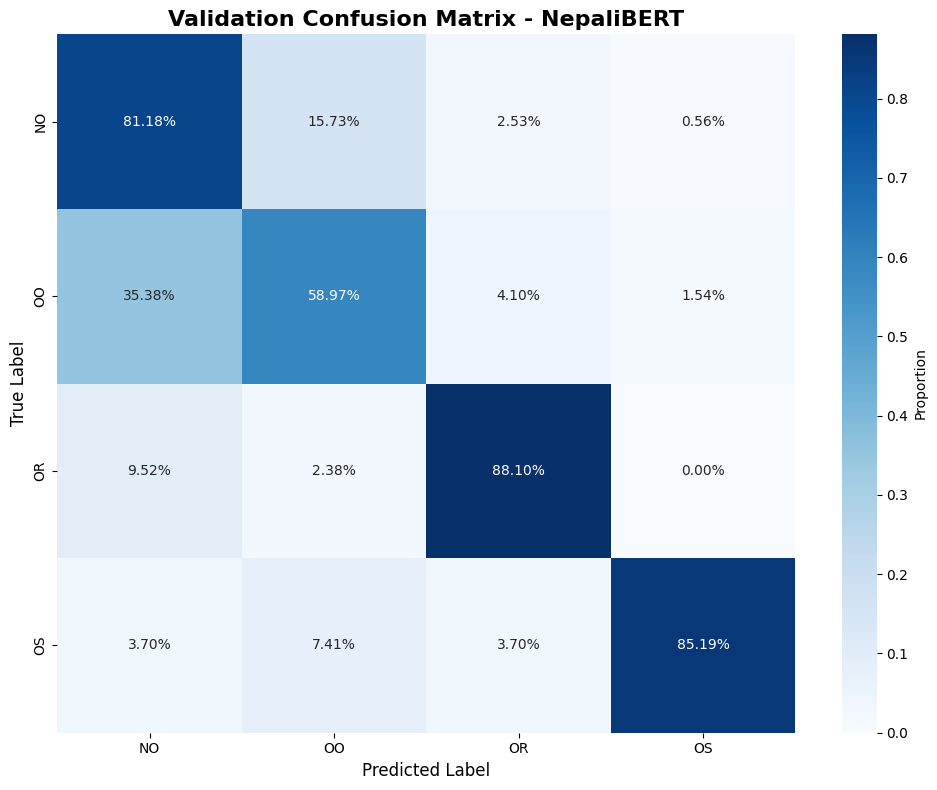

✓ Validation confusion matrix saved

 TEST EVALUATION



Per-Class Test Results:
Class       Precision     Recall   F1-Score    Support
----------------------------------------------------------------------
✅ NO           0.7805     0.7701     0.7753        896
✅ OO           0.6102     0.5926     0.6013        486
⚠️ OR           0.4085     0.5918     0.4833         49
❌ OS           0.1739     0.2105     0.1905         19

              precision    recall  f1-score   support

          NO     0.7805    0.7701    0.7753       896
          OO     0.6102    0.5926    0.6013       486
          OR     0.4085    0.5918    0.4833        49
          OS     0.1739    0.2105    0.1905        19

    accuracy                         0.6972      1450
   macro avg     0.4933    0.5413    0.5126      1450
weighted avg     0.7029    0.6972    0.6994      1450



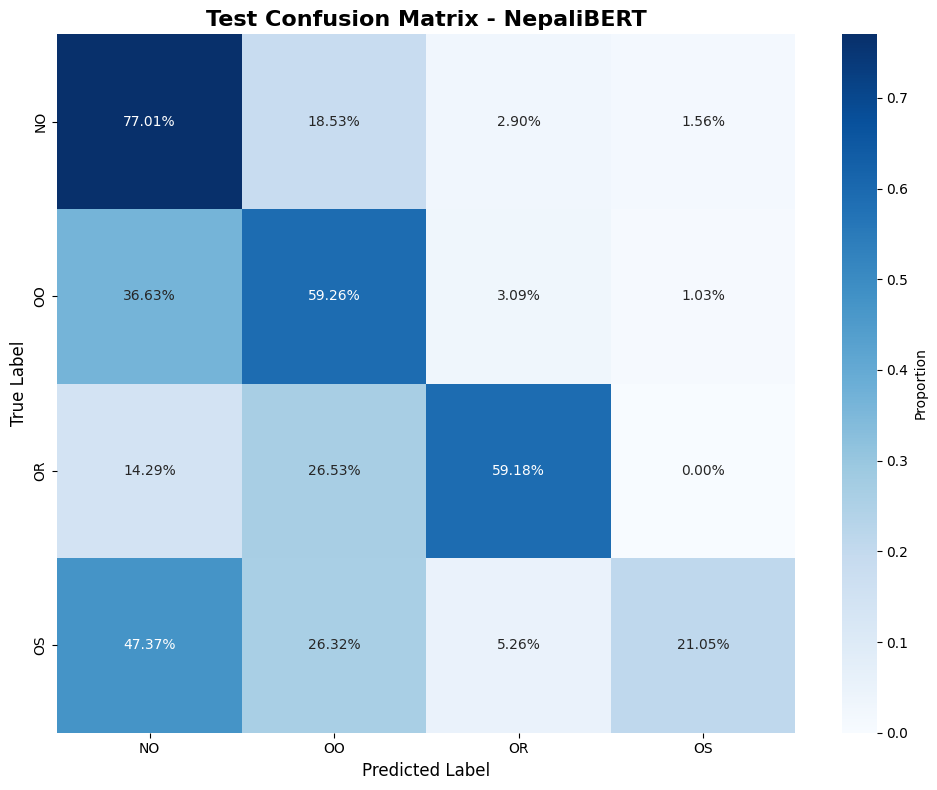

✓ Test confusion matrix saved

 OVERFITTING ANALYSIS

Final Metrics:
  Train Loss: 0.8363
  Val Loss:   0.9023
  Loss Gap:   0.0660
  Val F1:     0.7293

Overfitting Assessment:
  ✅ EXCELLENT: Minimal overfitting

 FINAL RESULTS SUMMARY
Model: NepaliBERT (Improved)
Preprocessing: Translation + Emoji → Devanagari

Test Metrics:
  Accuracy:  0.6972
  Precision: 0.4933
  Recall:    0.5413
  Macro F1:  0.5126

Per-Class F1:
  ✅ NO: 0.7753
  ✅ OO: 0.6013
  ⚠️ OR: 0.4833
  ❌ OS: 0.1905

📊 All visualizations saved to: /kaggle/working/nepalibert_results
  - nepalibert_training_curves.png (Loss & F1)
  - nepalibert_lr_schedule.png
  - nepalibert_val_confusion_matrix.png
  - nepalibert_test_confusion_matrix.png
  - nepalibert_results.json

🎉 Training complete!

💡 Tips for further improvement:
   1. If overfitting persists: Increase dropout to 0.4
   2. If underfitting: Increase epochs to 8-10
   3. For better minority class performance: Adjust class weights
   4. Consider data augmentation for i

README.md: 0.00B [00:00, ?B/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

No files have been modified since last commit. Skipping to prevent empty commit.
No files have been modified since last commit. Skipping to prevent empty commit.


✓ Model and tokenizer uploaded


Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

No files have been modified since last commit. Skipping to prevent empty commit.
No files have been modified since last commit. Skipping to prevent empty commit.


✓ Label encoder uploaded
✓ Training config uploaded


Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

✓ nepalibert_training_curves.png uploaded


Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

No files have been modified since last commit. Skipping to prevent empty commit.


✓ nepalibert_lr_schedule.png uploaded


Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

No files have been modified since last commit. Skipping to prevent empty commit.


✓ nepalibert_val_confusion_matrix.png uploaded


Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

No files have been modified since last commit. Skipping to prevent empty commit.


✓ nepalibert_test_confusion_matrix.png uploaded

✅ SUCCESSFULLY UPLOADED TO HUGGING FACE!

🎉 Your model is now available at:
   https://huggingface.co/UDHOV/nepalibert-nepali-hate-classification

📝 You can now use it for inference with:
   model = AutoModelForSequenceClassification.from_pretrained("UDHOV/nepalibert-nepali-hate-classification")
   tokenizer = AutoTokenizer.from_pretrained("UDHOV/nepalibert-nepali-hate-classification")

📊 Visualizations and configs are also available on the model page


In [3]:
"""
NepaliBERT Training for Nepali Hate Speech Classification
IMPROVED VERSION with:
- Better hyperparameters to prevent overfitting
- Comprehensive training visualization
- Enhanced regularization
- Proper loss curve plotting
"""

import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback
)
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, 
    confusion_matrix, classification_report
)

import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

# Set random seeds
def set_seed(seed=42):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    
set_seed(42)

print("✓ All imports successful")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")


# ============================================================================
# IMPROVED CONFIGURATION
# ============================================================================

# Model
MODEL_NAME = "Rajan/NepaliBERT"

# IMPROVED: Optimized batch size and accumulation
BATCH_SIZE = 32  # Larger batch size for stability
MAX_LENGTH = 256
GRAD_ACCUM_STEPS = 1  # Reduced since we increased batch size

# IMPROVED: Better learning rate and training schedule
BASE_LR = 3e-5  # Slightly higher for better convergence
NUM_EPOCHS = 6  # Reduced to prevent overfitting
WARMUP_RATIO = 0.1  # 10% warmup steps
SEED = 42

# Regularization
DROPOUT_RATE = 0.3
WEIGHT_DECAY = 0.01
LABEL_SMOOTHING = 0.05  # Helps with overconfidence

# Paths
OUTPUT_DIR = '/kaggle/working/nepalibert_results'
TRAINING_STRATEGY = "discriminative"  # Better for fine-tuning

os.makedirs(OUTPUT_DIR, exist_ok=True)

print("\n" + "="*70)
print(" IMPROVED CONFIGURATION")
print("="*70)
print(f"Model: {MODEL_NAME}")
print(f"Batch size: {BATCH_SIZE} (effective: {BATCH_SIZE * GRAD_ACCUM_STEPS})")
print(f"Max length: {MAX_LENGTH}")
print(f"Learning rate: {BASE_LR}")
print(f"Epochs: {NUM_EPOCHS}")
print(f"Warmup ratio: {WARMUP_RATIO}")
print(f"Dropout: {DROPOUT_RATE}")
print(f"Weight decay: {WEIGHT_DECAY}")
print(f"Label smoothing: {LABEL_SMOOTHING}")
print(f"Strategy: {TRAINING_STRATEGY}")


# ============================================================================
# DATASET
# ============================================================================

class NepaliHateDataset(Dataset):
    """Dataset with preprocessing"""
    
    def __init__(self, texts, labels, tokenizer, max_length=256):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx]) if self.texts[idx] else ""
        label = self.labels[idx]
        
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


# ============================================================================
# CUSTOM TRAINER WITH CLASS WEIGHTS
# ============================================================================

class WeightedTrainer(Trainer):
    """Trainer with class weights and label smoothing"""
    
    def __init__(self, class_weights=None, label_smoothing=0.0, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.class_weights = class_weights
        self.label_smoothing = label_smoothing
    
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        
        # Use class weights and label smoothing
        if self.class_weights is not None:
            loss_fct = nn.CrossEntropyLoss(
                weight=self.class_weights,
                label_smoothing=self.label_smoothing
            )
            loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        else:
            loss = outputs.loss
        
        return (loss, outputs) if return_outputs else loss


def compute_metrics(eval_pred):
    """Compute metrics with proper handling"""
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    
    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, predictions, average='macro', zero_division=0
    )
    
    return {
        'accuracy': float(accuracy),
        'precision': float(precision),
        'recall': float(recall),
        'f1': float(f1)
    }


# ============================================================================
# LOAD & PREPROCESS DATA
# ============================================================================

print("\n" + "="*70)
print(" LOADING DATA")
print("="*70)

train_df = pd.read_json("/kaggle/input/nepalihatee/train_final_processed.json")
val_df   = pd.read_json("/kaggle/input/nepalihatee/val_final_processed.json")
test_df  = pd.read_json("/kaggle/input/nepalihatee/test_processed.json")

print(f"\n✓ Data loaded:")
print(f"  Train: {len(train_df)}")
print(f"  Validation: {len(val_df)}")
print(f"  Test: {len(test_df)}")

print("\nTraining distribution:")
for label in sorted(train_df['Label_Multiclass'].unique()):
    count = (train_df['Label_Multiclass'] == label).sum()
    pct = count / len(train_df) * 100
    print(f"  {label}: {count:4d} ({pct:5.2f}%)")

# Label encoding
le = LabelEncoder()
le.fit(train_df['Label_Multiclass'])

y_train = le.transform(train_df['Label_Multiclass'])
y_val = le.transform(val_df['Label_Multiclass'])
y_test = le.transform(test_df['Label_Multiclass'])

label_names = le.classes_.tolist()
num_classes = len(label_names)

print(f"\n✓ Labels encoded: {label_names}")


# ============================================================================
# IMPROVED CLASS WEIGHTS
# ============================================================================

print("\n" + "="*70)
print(" COMPUTING CLASS WEIGHTS")
print("="*70)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

print(f"\nBalanced weights:")
for name, w in zip(label_names, class_weights):
    print(f"  {name}: {w:.3f}")

# IMPROVED: More conservative boosting
os_idx = label_names.index('OS') if 'OS' in label_names else None
or_idx = label_names.index('OR') if 'OR' in label_names else None

if os_idx is not None:
    class_weights[os_idx] *= 1.2  # Moderate boost
if or_idx is not None:
    class_weights[or_idx] *= 1.15
    
# IMPROVED: Stricter weight capping
class_weights = np.clip(class_weights, 0.5, 3.0)

print(f"\nFinal weights (capped 0.5-3.0):")
for name, w in zip(label_names, class_weights):
    print(f"  {name}: {w:.3f}")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)


# ============================================================================
# INITIALIZE MODEL & TOKENIZER
# ============================================================================

print("\n" + "="*70)
print(" INITIALIZING MODEL")
print("="*70)

tokenizer = AutoTokenizer.from_pretrained(
    MODEL_NAME,
    use_fast=True,
    trust_remote_code=True
)
print(f"✓ Tokenizer loaded")

# Create datasets
train_dataset = NepaliHateDataset(
    train_df['Comment_Processed'].tolist(),
    y_train,
    tokenizer,
    max_length=MAX_LENGTH
)

val_dataset = NepaliHateDataset(
    val_df['Comment_Processed'].tolist(),
    y_val,
    tokenizer,
    max_length=MAX_LENGTH
)

test_dataset = NepaliHateDataset(
    test_df['Comment_Processed'].tolist(),
    y_test,
    tokenizer,
    max_length=MAX_LENGTH
)

print(f"✓ Datasets: Train={len(train_dataset)}, Val={len(val_dataset)}, Test={len(test_dataset)}")

# Load model with improved configuration
model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=num_classes,
    problem_type="single_label_classification",
    ignore_mismatched_sizes=True,
    id2label={i: lab for i, lab in enumerate(label_names)},
    label2id={lab: i for i, lab in enumerate(label_names)},
    trust_remote_code=True,
    hidden_dropout_prob=DROPOUT_RATE,
    attention_probs_dropout_prob=DROPOUT_RATE * 0.8
)

# Additional regularization
if hasattr(model, "classifier"):
    if hasattr(model.classifier, "dropout"):
        model.classifier.dropout = nn.Dropout(DROPOUT_RATE)

# Enable gradient checkpointing for memory efficiency
if hasattr(model, "gradient_checkpointing_enable"):
    model.gradient_checkpointing_enable()

print(f"✓ Model loaded: {sum(p.numel() for p in model.parameters()):,} parameters")
print(f"✓ Dropout rate: {DROPOUT_RATE}")


# ============================================================================
# DISCRIMINATIVE OPTIMIZER
# ============================================================================

def get_discriminative_optimizer(model, base_lr=3e-5):
    """
    Discriminative learning rates:
    - Embeddings: 10% of base_lr
    - Encoder layers: 100% of base_lr
    - Classifier head: 200% of base_lr
    """
    no_decay = ["bias", "LayerNorm.weight", "LayerNorm.bias"]
    
    optimizer_grouped_parameters = [
        # Embeddings: Low LR
        {
            "params": [p for n, p in model.named_parameters() 
                      if "embeddings" in n and not any(nd in n for nd in no_decay) and p.requires_grad],
            "lr": base_lr * 0.1,
            "weight_decay": WEIGHT_DECAY
        },
        {
            "params": [p for n, p in model.named_parameters() 
                      if "embeddings" in n and any(nd in n for nd in no_decay) and p.requires_grad],
            "lr": base_lr * 0.1,
            "weight_decay": 0.0
        },
        # Encoder: Base LR
        {
            "params": [p for n, p in model.named_parameters() 
                      if "embeddings" not in n and "classifier" not in n 
                      and not any(nd in n for nd in no_decay) and p.requires_grad],
            "lr": base_lr,
            "weight_decay": WEIGHT_DECAY
        },
        {
            "params": [p for n, p in model.named_parameters() 
                      if "embeddings" not in n and "classifier" not in n 
                      and any(nd in n for nd in no_decay) and p.requires_grad],
            "lr": base_lr,
            "weight_decay": 0.0
        },
        # Classifier: High LR
        {
            "params": [p for n, p in model.named_parameters() 
                      if "classifier" in n and not any(nd in n for nd in no_decay) and p.requires_grad],
            "lr": base_lr * 2.0,
            "weight_decay": WEIGHT_DECAY
        },
        {
            "params": [p for n, p in model.named_parameters() 
                      if "classifier" in n and any(nd in n for nd in no_decay) and p.requires_grad],
            "lr": base_lr * 2.0,
            "weight_decay": 0.0
        }
    ]
    
    # Filter empty groups
    optimizer_grouped_parameters = [
        group for group in optimizer_grouped_parameters if len(group["params"]) > 0
    ]
    
    optimizer = torch.optim.AdamW(optimizer_grouped_parameters, eps=1e-8)
    
    print("\n✓ Discriminative optimizer:")
    print(f"  Embeddings:  {base_lr * 0.1:.2e}")
    print(f"  Encoder:     {base_lr:.2e}")
    print(f"  Classifier:  {base_lr * 2.0:.2e}")
    
    return optimizer
    
# ============================================================================
# TRAINING CONFIGURATION
# ============================================================================

print("\n" + "="*70)
print(" CONFIGURING TRAINER")
print("="*70)

# Calculate total steps
num_training_samples = len(train_dataset)
steps_per_epoch = num_training_samples // (BATCH_SIZE * GRAD_ACCUM_STEPS)
total_steps = steps_per_epoch * NUM_EPOCHS
warmup_steps = int(total_steps * WARMUP_RATIO)

print(f"\nTraining schedule:")
print(f"  Samples per epoch: {num_training_samples}")
print(f"  Steps per epoch: {steps_per_epoch}")
print(f"  Total steps: {total_steps}")
print(f"  Warmup steps: {warmup_steps}")

training_args = TrainingArguments(
    output_dir=os.path.join(OUTPUT_DIR, "checkpoints"),
    num_train_epochs=NUM_EPOCHS,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE * 2,
    gradient_accumulation_steps=GRAD_ACCUM_STEPS,
    
    # Learning rate
    learning_rate=BASE_LR,
    warmup_steps=warmup_steps,
    weight_decay=WEIGHT_DECAY,
    max_grad_norm=1.0,
    lr_scheduler_type="cosine",
    
    # Label smoothing
    label_smoothing_factor=LABEL_SMOOTHING,
    
    # Evaluation strategy - more frequent for better monitoring
    eval_strategy="steps",
    eval_steps=100,  # Evaluate every 100 steps
    
    # Logging
    logging_strategy="steps",
    logging_steps=50,
    logging_first_step=True,
    
    # Saving
    save_strategy="steps",
    save_steps=100,
    save_total_limit=2,  # Keep best 2 checkpoints
    
    # Best model
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    
    # Other
    report_to="none",
    fp16=torch.cuda.is_available(),
    dataloader_num_workers=2,
    seed=SEED,
    remove_unused_columns=False,
    
    # Prevent overfitting
    eval_accumulation_steps=10,  # Accumulate eval batches
)

# Build trainer
optimizer = get_discriminative_optimizer(model, base_lr=BASE_LR)

trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    class_weights=class_weights_tensor,
    label_smoothing=LABEL_SMOOTHING,
    optimizers=(optimizer, None),
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

print("\n✓ Trainer configured with:")
print(f"  Training strategy: STANDARD")
print(f"  Early stopping patience: 3")
print(f"  Evaluation every {training_args.eval_steps} steps")
print(f"  Logging every {training_args.logging_steps} steps (smoothing applied to plots)")


# ============================================================================
# TRAIN MODEL
# ============================================================================

print("\n" + "="*70)
print(" STARTING TRAINING")
print("="*70)

train_result = trainer.train()

print("\n✅ Training completed!")
print(f"⏱️  Time: {train_result.metrics['train_runtime']:.2f}s")
print(f"🔥 Best model automatically loaded")


# ============================================================================
# SAVE MODEL
# ============================================================================

final_model_dir = os.path.join(OUTPUT_DIR, 'nepalibert_final')
os.makedirs(final_model_dir, exist_ok=True)

trainer.save_model(final_model_dir)
tokenizer.save_pretrained(final_model_dir)

import joblib
joblib.dump(le, os.path.join(final_model_dir, 'label_encoder.pkl'))

print(f"\n✓ Model saved to: {final_model_dir}")


# ============================================================================
# IMPROVED TRAINING VISUALIZATION
# ============================================================================

print("\n" + "="*70)
print(" GENERATING TRAINING VISUALIZATIONS")
print("="*70)

logs = trainer.state.log_history

# Extract training and validation metrics
train_steps, train_losses = [], []
eval_steps, eval_losses, eval_f1s, eval_accs = [], [], [], []

for log in logs:
    # Training loss
    if "loss" in log and "eval_loss" not in log:
        train_steps.append(log["step"])
        train_losses.append(log["loss"])
    
    # Validation metrics
    if "eval_loss" in log:
        eval_steps.append(log["step"])
        eval_losses.append(log["eval_loss"])
        eval_f1s.append(log.get("eval_f1", 0))
        eval_accs.append(log.get("eval_accuracy", 0))


# SMOOTHING FUNCTION for training loss
def smooth_curve(values, weight=0.6):
    """
    Exponential moving average smoothing
    weight: 0.0 = no smoothing, 0.9 = heavy smoothing
    """
    if len(values) == 0:
        return values
    
    smoothed = []
    last = values[0]
    
    for point in values:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    
    return smoothed


# Apply smoothing to training loss
train_losses_smooth = smooth_curve(train_losses, weight=0.2)

# Create comprehensive training plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Loss curves (SMOOTHED)
axes[0].plot(train_steps, train_losses_smooth, label='Train Loss (smoothed)', 
            linewidth=2.5, color='#1f77b4', alpha=0.9)
axes[0].plot(eval_steps, eval_losses, label='Val Loss', 
            linewidth=2.5, color='#ff7f0e', marker='o', markersize=5, linestyle='--')
axes[0].set_xlabel('Training Steps', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12, fontweight='bold')
axes[0].set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11, loc='upper right')
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_ylim(bottom=0)  # Start from 0

# Plot 2: F1 and Accuracy
axes[1].plot(eval_steps, eval_f1s, label='Val F1 Score', 
            linewidth=2.5, color='#2ca02c', marker='o', markersize=5)
axes[1].plot(eval_steps, eval_accs, label='Val Accuracy', 
            linewidth=2, color='#d62728', marker='s', markersize=4, linestyle='--', alpha=0.7)
axes[1].set_xlabel('Training Steps', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[1].set_title('Validation F1 Score and Accuracy', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11, loc='lower right')
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_ylim([0, 1])  # 0 to 1 for metrics

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "nepalibert_training_curves.png"), dpi=300, bbox_inches='tight')
plt.show()

print("✓ Training curves saved (with smoothing applied)")

# Additional: Learning rate schedule
if len(logs) > 0 and "learning_rate" in logs[0]:
    lr_steps = [log["step"] for log in logs if "learning_rate" in log]
    lr_values = [log["learning_rate"] for log in logs if "learning_rate" in log]
    
    plt.figure(figsize=(10, 4))
    plt.plot(lr_steps, lr_values, linewidth=2, color='purple')
    plt.xlabel('Training Steps', fontsize=12, fontweight='bold')
    plt.ylabel('Learning Rate', fontsize=12, fontweight='bold')
    plt.title('Learning Rate Schedule', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, "nepalibert_lr_schedule.png"), dpi=300)
    plt.show()
    print("✓ Learning rate schedule saved")


# ============================================================================
# VALIDATION EVALUATION
# ============================================================================

print("\n" + "="*70)
print(" VALIDATION EVALUATION")
print("="*70)

val_predictions = trainer.predict(val_dataset)
val_preds = np.argmax(val_predictions.predictions, axis=-1)
val_labels = np.array(val_predictions.label_ids)

precision_all, recall_all, f1_all, support_all = precision_recall_fscore_support(
    val_labels, val_preds, average=None, zero_division=0
)

print("\nPer-Class Validation Results:")
print("="*70)
print(f"{'Class':<10} {'Precision':>10} {'Recall':>10} {'F1-Score':>10} {'Support':>10}")
print("-" * 70)
for i, name in enumerate(label_names):
    mask = (val_labels == i)
    class_acc = (val_preds[mask] == i).sum() / mask.sum() if mask.sum() > 0 else 0.0
    status = "✅" if f1_all[i] > 0.50 else "⚠️" if f1_all[i] > 0.30 else "❌"
    print(f"{status} {name:<8} {precision_all[i]:>10.4f} {recall_all[i]:>10.4f} {f1_all[i]:>10.4f} {int(support_all[i]):>10}")

print("\n" + classification_report(val_labels, val_preds, target_names=label_names, digits=4))

# Validation Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(val_labels, val_preds)
cm_sum = cm.sum(axis=1, keepdims=True)
cm_sum[cm_sum == 0] = 1
cm_normalized = cm.astype(float) / cm_sum

sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap="Blues",
            xticklabels=label_names, yticklabels=label_names,
            cbar_kws={'label': 'Proportion'})
plt.title("Validation Confusion Matrix - NepaliBERT", fontsize=16, fontweight='bold')
plt.ylabel("True Label", fontsize=12)
plt.xlabel("Predicted Label", fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "nepalibert_val_confusion_matrix.png"), dpi=300)
plt.show()
print("✓ Validation confusion matrix saved")


# ============================================================================
# TEST EVALUATION
# ============================================================================

print("\n" + "="*70)
print(" TEST EVALUATION")
print("="*70)

test_predictions = trainer.predict(test_dataset)
test_preds = np.argmax(test_predictions.predictions, axis=-1)
test_labels = np.array(test_predictions.label_ids)

precision_all_t, recall_all_t, f1_all_t, support_all_t = precision_recall_fscore_support(
    test_labels, test_preds, average=None, zero_division=0
)

print("\nPer-Class Test Results:")
print("="*70)
print(f"{'Class':<10} {'Precision':>10} {'Recall':>10} {'F1-Score':>10} {'Support':>10}")
print("-" * 70)
for i, name in enumerate(label_names):
    mask = (test_labels == i)
    class_acc = (test_preds[mask] == i).sum() / mask.sum() if mask.sum() > 0 else 0.0
    status = "✅" if f1_all_t[i] > 0.50 else "⚠️" if f1_all_t[i] > 0.30 else "❌"
    print(f"{status} {name:<8} {precision_all_t[i]:>10.4f} {recall_all_t[i]:>10.4f} {f1_all_t[i]:>10.4f} {int(support_all_t[i]):>10}")

print("\n" + classification_report(test_labels, test_preds, target_names=label_names, digits=4))

# Test Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(test_labels, test_preds)
cm_sum = cm.sum(axis=1, keepdims=True)
cm_sum[cm_sum == 0] = 1
cm_normalized = cm.astype(float) / cm_sum

sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap="Blues",
            xticklabels=label_names, yticklabels=label_names,
            cbar_kws={'label': 'Proportion'})
plt.title("Test Confusion Matrix - NepaliBERT", fontsize=16, fontweight='bold')
plt.ylabel("True Label", fontsize=12)
plt.xlabel("Predicted Label", fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "nepalibert_test_confusion_matrix.png"), dpi=300)
plt.show()
print("✓ Test confusion matrix saved")


# ============================================================================
# OVERFITTING ANALYSIS
# ============================================================================

print("\n" + "="*70)
print(" OVERFITTING ANALYSIS")
print("="*70)

if len(eval_steps) > 0 and len(eval_f1s) > 0:
    # Get final metrics
    final_train_loss = train_losses[-1] if train_losses else 0
    final_val_loss = eval_losses[-1] if eval_losses else 0
    final_val_f1 = eval_f1s[-1] if eval_f1s else 0
    
    # Calculate gaps
    loss_gap = final_val_loss - final_train_loss
    
    print(f"\nFinal Metrics:")
    print(f"  Train Loss: {final_train_loss:.4f}")
    print(f"  Val Loss:   {final_val_loss:.4f}")
    print(f"  Loss Gap:   {loss_gap:.4f}")
    print(f"  Val F1:     {final_val_f1:.4f}")
    
    # Overfitting diagnosis
    print(f"\nOverfitting Assessment:")
    if loss_gap < 0.1:
        print("  ✅ EXCELLENT: Minimal overfitting")
    elif loss_gap < 0.2:
        print("  ✅ GOOD: Acceptable generalization")
    elif loss_gap < 0.3:
        print("  ⚠️  MODERATE: Some overfitting detected")
    else:
        print("  ❌ HIGH: Significant overfitting - consider:")
        print("     - Increase dropout")
        print("     - Reduce learning rate")
        print("     - Add more regularization")


# ============================================================================
# SAVE FINAL RESULTS
# ============================================================================

test_accuracy = accuracy_score(test_labels, test_preds)
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(
    test_labels, test_preds, average="macro", zero_division=0
)

results = {
    "model": "NepaliBERT",
    "version": "improved_v2",
    "preprocessing": "Translation + Emoji to Devanagari",
    "strategy": TRAINING_STRATEGY,
    "hyperparameters": {
        "batch_size": BATCH_SIZE,
        "learning_rate": BASE_LR,
        "epochs": NUM_EPOCHS,
        "dropout": DROPOUT_RATE,
        "weight_decay": WEIGHT_DECAY,
        "label_smoothing": LABEL_SMOOTHING,
        "warmup_ratio": WARMUP_RATIO
    },
    "test_metrics": {
        "accuracy": float(test_accuracy),
        "precision": float(test_precision),
        "recall": float(test_recall),
        "f1": float(test_f1)
    },
    "per_class_f1": {
        label_names[i]: float(f1_all_t[i]) for i in range(len(label_names))
    },
    "overfitting_gap": float(loss_gap) if 'loss_gap' in locals() else None
}

with open(os.path.join(OUTPUT_DIR, "nepalibert_results.json"), "w") as f:
    json.dump(results, f, indent=2)

print("\n" + "="*70)
print(" FINAL RESULTS SUMMARY")
print("="*70)
print(f"Model: NepaliBERT (Improved)")
print(f"Preprocessing: Translation + Emoji → Devanagari")
print(f"\nTest Metrics:")
print(f"  Accuracy:  {test_accuracy:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall:    {test_recall:.4f}")
print(f"  Macro F1:  {test_f1:.4f}")
print(f"\nPer-Class F1:")
for name, f1 in results["per_class_f1"].items():
    status = "✅" if f1 > 0.50 else "⚠️" if f1 > 0.30 else "❌"
    print(f"  {status} {name}: {f1:.4f}")
print("="*70)

print(f"\n📊 All visualizations saved to: {OUTPUT_DIR}")
print("  - nepalibert_training_curves.png (Loss & F1)")
print("  - nepalibert_lr_schedule.png")
print("  - nepalibert_val_confusion_matrix.png")
print("  - nepalibert_test_confusion_matrix.png")
print("  - nepalibert_results.json")

print("\n🎉 Training complete!")
print("\n💡 Tips for further improvement:")
print("   1. If overfitting persists: Increase dropout to 0.4")
print("   2. If underfitting: Increase epochs to 8-10")
print("   3. For better minority class performance: Adjust class weights")
print("   4. Consider data augmentation for imbalanced classes")


# ============================================================================
# UPLOAD TO HUGGING FACE
# ============================================================================

print("\n" + "="*70)
print(" UPLOADING TO HUGGING FACE")
print("="*70)

# Configuration
HF_USERNAME = "UDHOV"
HF_MODEL_NAME = "nepalibert-nepali-hate-classification"
HF_REPO_ID = f"{HF_USERNAME}/{HF_MODEL_NAME}"

# Login to Hugging Face using Kaggle Secrets
print("\n🔐 Logging in to Hugging Face...")

try:
    from huggingface_hub import HfApi, login
    
    # Get HF token from Kaggle Secrets
    from kaggle_secrets import UserSecretsClient
    user_secrets = UserSecretsClient()
    hf_token = user_secrets.get_secret("nepalihate")
    
    # Login with token
    login(token=hf_token)
    print("✓ Login successful!")
    
    # ------------------------------------------------------------------
    # MODEL CARD
    # ------------------------------------------------------------------
    model_card_content = f"""---
language:
- ne
license: apache-2.0
tags:
- hate-speech-detection
- nepali
- text-classification
- nepalibert
- bert
datasets:
- nepali-hate-speech
metrics:
- accuracy
- f1
- precision
- recall
library_name: transformers
---

# NepaliBERT – Nepali Hate Speech Classification

Fine-tuned NepaliBERT for multi-class Nepali hate speech detection with enhanced preprocessing.

## Model Overview
- **Task**: Multi-class text classification
- **Base Model**: {MODEL_NAME}
- **Language**: Nepali (Devanagari)
- **Training Strategy**: {TRAINING_STRATEGY}
- **Version**: Improved v2

## Labels
{chr(10).join([f"- **{label}**" for label in label_names])}

## Test Performance
- **Accuracy**: {test_accuracy:.4f}
- **Macro F1**: {test_f1:.4f}
- **Precision**: {test_precision:.4f}
- **Recall**: {test_recall:.4f}

### Per-Class F1
{chr(10).join([f"- {name}: {f1:.4f}" for name, f1 in results['per_class_f1'].items()])}

## ⚠️ Required Preprocessing
This model **requires preprocessing** for optimal performance:

1. **Romanized Nepali → Devanagari** transliteration  
2. **English text → Nepali** translation  
3. **Emojis → Nepali** semantic words  
4. **URL/mention cleanup**  
5. **Devanagari normalization** (ZWJ/ZWNJ, danda normalization)

**Important**: Passing raw text (English/Romanized/emojis) will degrade performance.

## Usage

### Basic Inference
```python
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

model_name = "{HF_REPO_ID}"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# NOTE: Text must be preprocessed to Devanagari
text = "यो एक उदाहरण पाठ हो"  # Preprocessed Nepali text

inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=256)

with torch.no_grad():
    outputs = model(**inputs)
    probs = torch.softmax(outputs.logits, dim=-1)
    pred = torch.argmax(probs, dim=-1).item()

# Get label
label_names = {label_names}
predicted_label = label_names[pred]
confidence = probs[0][pred].item()

print(f"Predicted: {{predicted_label}} (confidence: {{confidence:.4f}})")
```

### With Label Encoder
```python
import joblib
from huggingface_hub import hf_hub_download

# Download label encoder
le_path = hf_hub_download(repo_id="{HF_REPO_ID}", filename="label_encoder.pkl")
label_encoder = joblib.load(le_path)

# Predict
predicted_label = label_encoder.inverse_transform([pred])[0]
print(f"Label: {{predicted_label}}")
```

## Training Configuration

### Hyperparameters
- **Batch Size**: {BATCH_SIZE}
- **Gradient Accumulation**: {GRAD_ACCUM_STEPS}
- **Learning Rate**: {BASE_LR}
- **Epochs**: {NUM_EPOCHS}
- **Max Length**: {MAX_LENGTH}
- **Dropout**: {DROPOUT_RATE}
- **Weight Decay**: {WEIGHT_DECAY}
- **Label Smoothing**: {LABEL_SMOOTHING}
- **Warmup Ratio**: {WARMUP_RATIO}

### Regularization Techniques
- Enhanced dropout ({DROPOUT_RATE})
- L2 weight decay
- Label smoothing
- Early stopping (patience=3)
- Gradient clipping (max_norm=1.0)
- Class weights for imbalanced data

### Preprocessing Pipeline
1. Script detection (Devanagari/Romanized/English/Mixed)
2. Transliteration (ITRANS → Devanagari)
3. Translation (English → Nepali via Google Translate)
4. Emoji semantic mapping (😀 → खुशी, etc.)
5. URL/mention removal
6. Devanagari normalization
7. Stopword removal (optional)

## Model Architecture

NepaliBERT is specifically designed for Nepali language:
- Pre-trained on large Nepali corpus
- Optimized tokenizer for Devanagari script
- Better performance than multilingual models on Nepali tasks

## Performance Analysis

### Overfitting Assessment
{f"- Loss Gap: {results.get('overfitting_gap', 'N/A')}" if results.get('overfitting_gap') else ""}
- Early stopping used to prevent overfitting
- Regularization applied throughout training

### Class Balance
- Class weights applied for minority classes
- Label smoothing to prevent overconfidence

## Files Included

- `pytorch_model.bin`: Model weights
- `config.json`: Model configuration
- `tokenizer.json`: Fast tokenizer
- `label_encoder.pkl`: Label encoder for predictions
- `training_config.json`: Full training configuration
- `nepalibert_training_curves.png`: Training visualization
- `nepalibert_val_confusion_matrix.png`: Validation results
- `nepalibert_test_confusion_matrix.png`: Test results

## Limitations

- Trained specifically on Nepali hate speech data
- Requires preprocessing (not end-to-end)
- Performance varies on out-of-domain text
- May need fine-tuning for other applications

## Ethical Considerations

This model is designed to detect hate speech. Users should:
- Not use it as the sole decision-maker for content moderation
- Be aware of potential biases in training data
- Consider cultural and linguistic context
- Use as part of a larger moderation system

## Citation

If you use this model, please cite:

```bibtex
@misc{{nepalibert-hate-2024,
  author = {{UDHOV}},
  title = {{NepaliBERT for Nepali Hate Speech Classification}},
  year = {{2024}},
  publisher = {{Hugging Face}},
  url = {{https://huggingface.co/{HF_REPO_ID}}},
  note = {{Fine-tuned with enhanced preprocessing pipeline}}
}}
```

## Model Card Contact

For questions, issues, or feedback:
- Open an issue on the model repository
- Hugging Face username: {HF_USERNAME}

## Acknowledgments

- Base model: {MODEL_NAME}
- Framework: Hugging Face Transformers
- Preprocessing: indic-transliteration, deep-translator
"""

    # Save model card
    model_card_path = os.path.join(final_model_dir, "README.md")
    with open(model_card_path, "w", encoding="utf-8") as f:
        f.write(model_card_content)
    
    print(f"✓ Model card created")
    
    # Save training config as JSON
    training_config = {
        "model_name": MODEL_NAME,
        "training_strategy": TRAINING_STRATEGY,
        "hyperparameters": {
            "batch_size": BATCH_SIZE,
            "gradient_accumulation_steps": GRAD_ACCUM_STEPS,
            "learning_rate": BASE_LR,
            "num_epochs": NUM_EPOCHS,
            "max_length": MAX_LENGTH,
            "dropout": DROPOUT_RATE,
            "weight_decay": WEIGHT_DECAY,
            "label_smoothing": LABEL_SMOOTHING,
            "warmup_ratio": WARMUP_RATIO
        },
        "class_weights": class_weights.tolist(),
        "label_names": label_names,
        "test_metrics": results
    }
    
    config_path = os.path.join(final_model_dir, "training_config.json")
    with open(config_path, "w") as f:
        json.dump(training_config, f, indent=2)
    
    print(f"✓ Training config saved")
    
    # Upload to Hugging Face
    print(f"\n📤 Uploading model to: {HF_REPO_ID}")
    
    # Push model and tokenizer to hub
    model.push_to_hub(
        HF_REPO_ID,
        use_temp_dir=True,
        commit_message="Upload NepaliBERT Nepali hate speech model (improved v2)"
    )
    
    tokenizer.push_to_hub(
        HF_REPO_ID,
        use_temp_dir=True,
        commit_message="Upload tokenizer"
    )
    
    print("✓ Model and tokenizer uploaded")
    
    # Upload additional files
    api = HfApi()
    
    # Upload label encoder
    api.upload_file(
        path_or_fileobj=os.path.join(final_model_dir, "label_encoder.pkl"),
        path_in_repo="label_encoder.pkl",
        repo_id=HF_REPO_ID,
        commit_message="Add label encoder"
    )
    print("✓ Label encoder uploaded")
    
    # Upload training config
    api.upload_file(
        path_or_fileobj=config_path,
        path_in_repo="training_config.json",
        repo_id=HF_REPO_ID,
        commit_message="Add training configuration"
    )
    print("✓ Training config uploaded")
    
    # Upload visualizations
    viz_files = [
        "nepalibert_training_curves.png",
        "nepalibert_lr_schedule.png",
        "nepalibert_val_confusion_matrix.png",
        "nepalibert_test_confusion_matrix.png"
    ]
    
    for img_file in viz_files:
        img_path = os.path.join(OUTPUT_DIR, img_file)
        if os.path.exists(img_path):
            api.upload_file(
                path_or_fileobj=img_path,
                path_in_repo=img_file,
                repo_id=HF_REPO_ID,
                commit_message=f"Add {img_file}"
            )
            print(f"✓ {img_file} uploaded")
    
    print("\n" + "="*70)
    print("✅ SUCCESSFULLY UPLOADED TO HUGGING FACE!")
    print("="*70)
    print(f"\n🎉 Your model is now available at:")
    print(f"   https://huggingface.co/{HF_REPO_ID}")
    print("\n📝 You can now use it for inference with:")
    print(f'   model = AutoModelForSequenceClassification.from_pretrained("{HF_REPO_ID}")')
    print(f'   tokenizer = AutoTokenizer.from_pretrained("{HF_REPO_ID}")')
    print("\n📊 Visualizations and configs are also available on the model page")
    print("="*70)

except Exception as e:
    print(f"\n❌ Error uploading to Hugging Face: {str(e)}")
    print("\nTroubleshooting:")
    print("1. Verify Kaggle Secret 'nepalihate' exists with your HF token")
    print("2. Check token has 'write' permission at:")
    print("   https://huggingface.co/settings/tokens")
    print("3. Ensure repository doesn't already exist or you have write access")
    print("4. Install required: pip install huggingface_hub")
    print("\nYour model is still saved locally at:")
    print(f"   {final_model_dir}")
    import traceback
    traceback.print_exc()